In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from sklearn.preprocessing import LabelEncoder



import warnings

warnings.filterwarnings("ignore")

In [ ]:
encodings = ["utf-8", "ISO-8859-1", "latin1", "cp1252"]

for encoding in encodings:
    try:
        art_locations = pd.read_csv("/content/2020_ARTClinicLocations.csv", encoding=encoding)
        art_patients_char = pd.read_csv("/content/2020_Final_Assisted_Reproductive_Technology__ART__Patient_and_Cycle_Characteristics_20231012.csv", encoding=encoding)
        art_success = pd.read_csv("/content/2020_Final_Assisted_Reproductive_Technology__ART__Success_Rates_20231012.csv", encoding=encoding, error_bad_lines=False)
        break
    except UnicodeDecodeError:
        continue







In [ ]:
print(art_patients_char.shape)
print(art_locations.shape)
print(art_success.shape)

(28864, 25)
(448, 10)
(88378, 29)


## EDA


Going through each data to derive insights

In [ ]:
##  art_locations

art_locations.head()


,,State,FacilityName,Address,City,ZipCode,Clinic Status,Total Number of Cycles,ClinicId,Geolocation
0,2020,IL,Institute for Human Reproduction (IHR),"409 W. Huron St, Suite 500",Chicago,60654,Open,854,1,POINT (-87.6390277 41.894496)
1,2020,PA,Shady Grove Fertility-Pennsylvania,945 Chesterbrook Blvd,Wayne,19087,Open,"2,245",2,POINT (-75.4618736 40.0681343)
2,2020,TX,"Houston Infertility Clinic, Sonja Kristiansen, MD","9055 Katy Freeway, Suite 450",Houston,77024,Open,223,3,POINT (-95.5122645 29.7835813)
3,2020,FL,"Advanced Reproductive Specialists, Jacksonvill...","7051 Southpoint Pkwy, Suite 200",Jacksonville,32216,Open,310,4,POINT (-81.5907066 30.2576625)
4,2020,PA,Penn State Milton S. Hershey Medical Center,"35 Hope Dr, Suite 202",Hershey,17033,Open,130,6,POINT (-76.6611392 40.2701599)


In [ ]:
art_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0                           448 non-null    int64 
 1   State                   448 non-null    object
 2   FacilityName            448 non-null    object
 3   Address                 448 non-null    object
 4   City                    448 non-null    object
 5   ZipCode                 448 non-null    int64 
 6   Clinic Status           448 non-null    object
 7   Total Number of Cycles  448 non-null    object
 8   ClinicId                448 non-null    int64 
 9   Geolocation             448 non-null    object
dtypes: int64(3), object(7)
memory usage: 35.1+ KB


In [ ]:
# Replacing commas with an empty string and then converting to int
art_locations["Total Number of Cycles"] = art_locations["Total Number of Cycles"].str.replace(',', '').astype(int)



In [ ]:
art_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0                           448 non-null    int64 
 1   State                   448 non-null    object
 2   FacilityName            448 non-null    object
 3   Address                 448 non-null    object
 4   City                    448 non-null    object
 5   ZipCode                 448 non-null    int64 
 6   Clinic Status           448 non-null    object
 7   Total Number of Cycles  448 non-null    int64 
 8   ClinicId                448 non-null    int64 
 9   Geolocation             448 non-null    object
dtypes: int64(4), object(6)
memory usage: 35.1+ KB


In [ ]:
art_locations.describe()

,,ZipCode,Total Number of Cycles,ClinicId
count,448.0,448.000000,448.000000,448.000000
mean,2020.0,53648.524554,721.160714,354.620536
std,0.0,31667.707470,1159.249588,241.779697
min,2020.0,726.000000,9.000000,1.000000
25%,2020.0,23875.000000,183.000000,147.750000
50%,2020.0,56505.000000,376.500000,327.500000
75%,2020.0,85255.750000,816.500000,498.000000
max,2020.0,99603.000000,12035.000000,848.000000


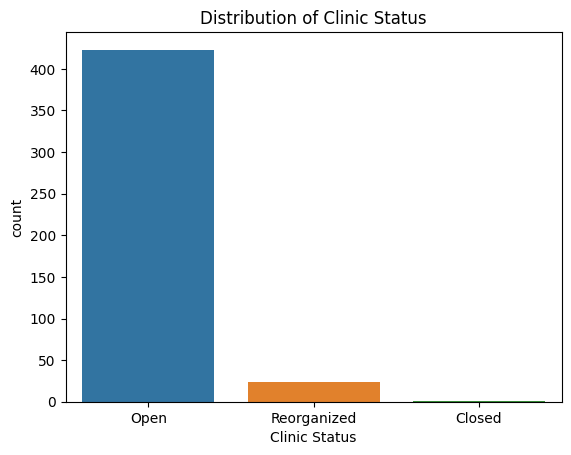

In [ ]:
# Distribution of Clinic Status
sns.countplot(x='Clinic Status', data=art_locations)
plt.title('Distribution of Clinic Status')
plt.show()


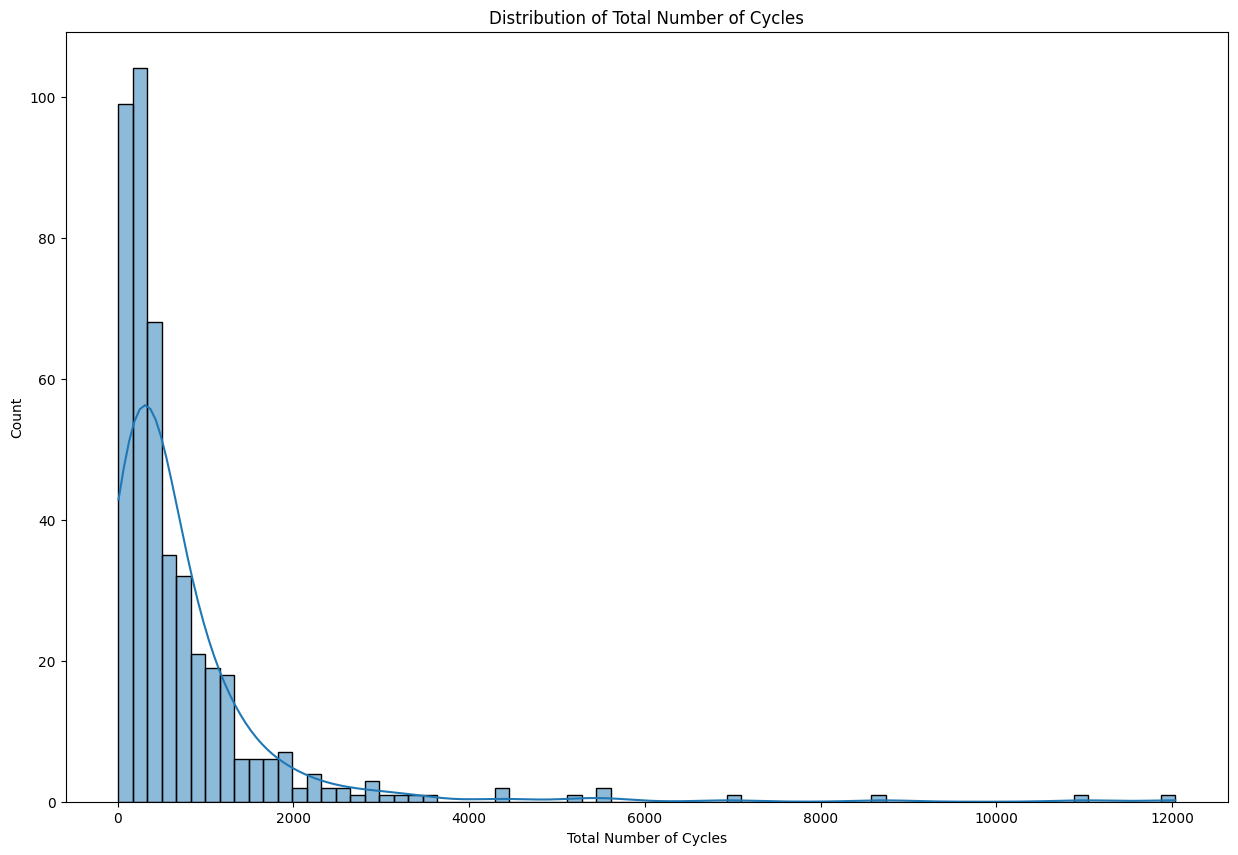

In [ ]:
# Distribution of Total Number of Cycles
plt.figure(figsize=(15, 10))
sns.histplot(art_locations['Total Number of Cycles'], kde=True)
plt.title('Distribution of Total Number of Cycles')
plt.xlabel('Total Number of Cycles')
plt.ylabel('Count')
plt.show()

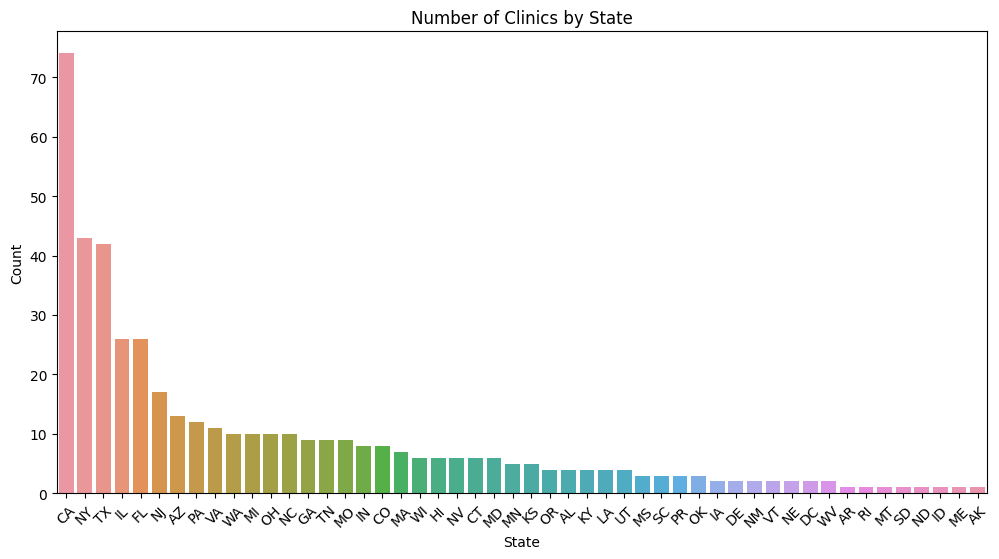

In [ ]:
# Distribution of clinics by state
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=art_locations, order=art_locations['State'].value_counts().index)
plt.title('Number of Clinics by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

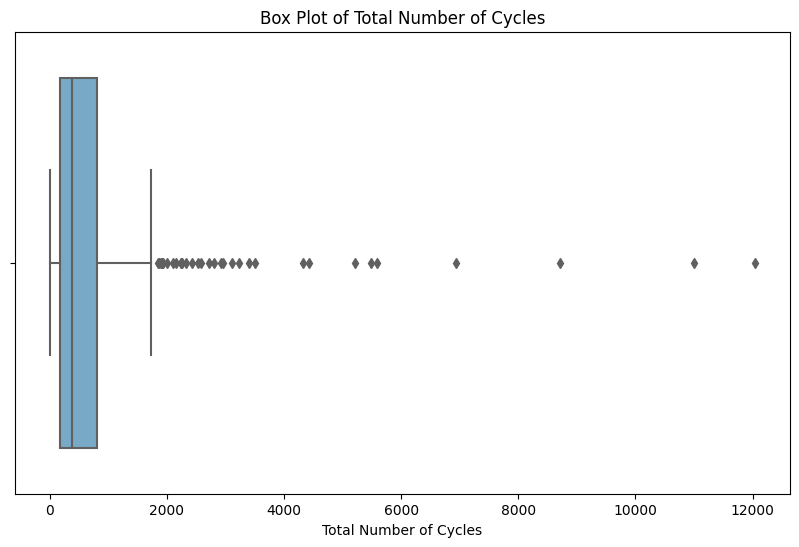

In [ ]:
# Box Plot for Total Number of Cycles
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total Number of Cycles', data=art_locations, palette='Blues')
plt.title('Box Plot of Total Number of Cycles')
plt.xlabel('Total Number of Cycles')
plt.show()

In [ ]:
### art_patients_char

art_patients_char.head()

,Year,LocationAbbr,LocationDesc,FacilityName,MedicalDirector,Address,City,ZipCode,Phone,Clinic Status,...,Data_Value_num,Data_Value_Footnote_Symbol,Data_Value_Footnote,Cycle_Count,ClinicId,TopicId,QuestionId,BreakOutCategoryId,BreakOutId,Geolocation
0,2020,OH,Ohio,SpringCreek Fertility,"Jeremy M. Groll, MD",7095 Clyo Rd,Dayton,45459,(937) 458-5084,Open,...,8.7,NaN,NaN,623.0,618,TOP02,Q001,CAT2,B004,POINT (-84.1389377 39.6422362)
1,2020,IL,Illinois,IVF1,"Randy S. Morris, MD",3 N. Washington St,Naperville,60540,(630) 357-6540,Open,...,16.7,NaN,NaN,914.0,17,TOP02,Q001,CAT2,B004,POINT (-88.1480279 41.7753663)
2,2020,GA,Georgia,Reproductive Biology Associates,"Daniel B. Shapiro, MD","1100 Johnson Ferry Rd N.E., Suite 200",Atlanta,30342,(404) 257-1900,Open,...,19.0,NaN,NaN,1894.0,196,TOP02,Q001,CAT2,B003,POINT (-84.3495338 33.9069838)
3,2020,CA,California,Pacific Fertility Center,"Philip E. Chenette, MD","55 Francisco St, Suite 500",San Francisco,94133,(415) 834-3000,Open,...,29.0,NaN,NaN,1488.0,214,TOP02,Q001,CAT2,B004,POINT (-122.405558 37.8054243)
4,2020,FL,Florida,The IVF Center,"Mark P. Trolice, MD",5901 Brick Ct,Winter Park,32792,(407) 672-1106,Reorganized,...,0.0,NaN,NaN,287.0,295,TOP02,Q002,CAT12,B009,POINT (-81.2756707 28.611928)


In [ ]:
art_patients_char.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'FacilityName',
       'MedicalDirector', 'Address', 'City', 'ZipCode', 'Phone',
       'Clinic Status', 'Topic', 'Question', 'Breakout_Category', 'Breakout',
       'Data_Value', 'Data_Value_num', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Cycle_Count', 'ClinicId', 'TopicId',
       'QuestionId', 'BreakOutCategoryId', 'BreakOutId', 'Geolocation'],
      dtype='object')

In [ ]:
art_patients_char.isna().sum()

Year                              0
LocationAbbr                    128
LocationDesc                      0
FacilityName                      0
MedicalDirector                   0
Address                           0
City                              0
ZipCode                           0
Phone                             0
Clinic Status                     0
Topic                             0
Question                          0
Breakout_Category                 0
Breakout                          0
Data_Value                        3
Data_Value_num                    0
Data_Value_Footnote_Symbol    25179
Data_Value_Footnote           25099
Cycle_Count                     612
ClinicId                          0
TopicId                           0
QuestionId                        0
BreakOutCategoryId                0
BreakOutId                        0
Geolocation                     128
dtype: int64

In [ ]:
art_patients_char.drop(["Data_Value_Footnote_Symbol","Data_Value_Footnote"], axis=1, inplace=True)

In [ ]:
art_patients_char.isna().sum()

Year                    0
LocationAbbr          128
LocationDesc            0
FacilityName            0
MedicalDirector         0
Address                 0
City                    0
ZipCode                 0
Phone                   0
Clinic Status           0
Topic                   0
Question                0
Breakout_Category       0
Breakout                0
Data_Value              3
Data_Value_num          0
Cycle_Count           612
ClinicId                0
TopicId                 0
QuestionId              0
BreakOutCategoryId      0
BreakOutId              0
Geolocation           128
dtype: int64

In [ ]:
art_patients_char.drop("Data_Value", axis=1, inplace=True)

In [ ]:
art_patients_char.isna().sum()

Year                    0
LocationAbbr          128
LocationDesc            0
FacilityName            0
MedicalDirector         0
Address                 0
City                    0
ZipCode                 0
Phone                   0
Clinic Status           0
Topic                   0
Question                0
Breakout_Category       0
Breakout                0
Data_Value_num          0
Cycle_Count           612
ClinicId                0
TopicId                 0
QuestionId              0
BreakOutCategoryId      0
BreakOutId              0
Geolocation           128
dtype: int64

In [ ]:
art_patients_char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28864 entries, 0 to 28863
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                28864 non-null  int64  
 1   LocationAbbr        28736 non-null  object 
 2   LocationDesc        28864 non-null  object 
 3   FacilityName        28864 non-null  object 
 4   MedicalDirector     28864 non-null  object 
 5   Address             28864 non-null  object 
 6   City                28864 non-null  object 
 7   ZipCode             28864 non-null  object 
 8   Phone               28864 non-null  object 
 9   Clinic Status       28864 non-null  object 
 10  Topic               28864 non-null  object 
 11  Question            28864 non-null  object 
 12  Breakout_Category   28864 non-null  object 
 13  Breakout            28864 non-null  object 
 14  Data_Value_num      28864 non-null  float64
 15  Cycle_Count         28252 non-null  float64
 16  Clin

In [ ]:
art_patients_char.describe()

,Year,Data_Value_num,Cycle_Count,ClinicId
count,28864.0,28864.000000,28252.000000,28864.000000
mean,2020.0,24.095912,1735.566615,396.713969
std,0.0,29.792722,17947.783870,684.739564
min,2020.0,0.000000,0.000000,1.000000
25%,2020.0,1.300000,139.000000,147.000000
50%,2020.0,10.600000,303.000000,328.000000
75%,2020.0,36.500000,648.000000,503.000000
max,2020.0,195.600000,326471.000000,9999.000000


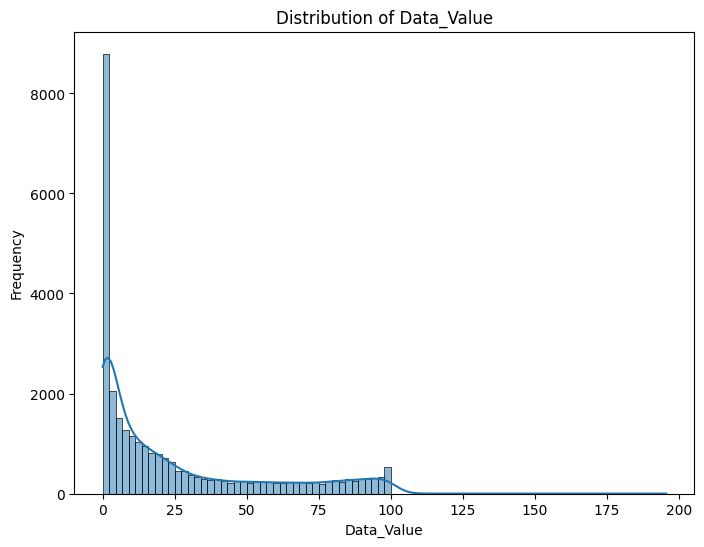

In [ ]:
##Histogram of Data_Value

plt.figure(figsize=(8, 6))
sns.histplot(art_patients_char['Data_Value_num'], kde=True)
plt.title('Distribution of Data_Value')
plt.xlabel('Data_Value')
plt.ylabel('Frequency')
plt.show()


<Axes: >

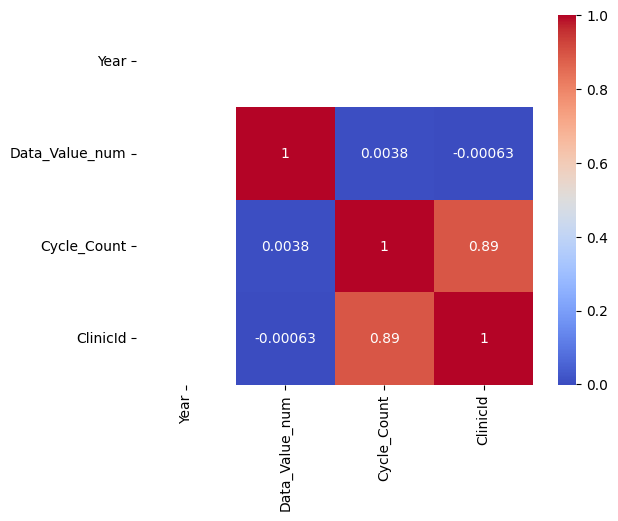

In [ ]:
sns.heatmap(art_patients_char.corr(), annot=True, cmap='coolwarm')

In [ ]:
art_patients_char.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'FacilityName',
       'MedicalDirector', 'Address', 'City', 'ZipCode', 'Phone',
       'Clinic Status', 'Topic', 'Question', 'Breakout_Category', 'Breakout',
       'Data_Value_num', 'Cycle_Count', 'ClinicId', 'TopicId', 'QuestionId',
       'BreakOutCategoryId', 'BreakOutId', 'Geolocation'],
      dtype='object')

In [ ]:
def process_column(value):
    if value == 'Breakout':
        return np.nan
    elif value == 'Yes':
        return 1
    elif '>' in value:
        return int(value[1:])  # Convert ">40" to 40 (or choose a suitable value)
    elif '<' in value:
        return int(value[1:])  # Convert "<35" to 35 (or choose a suitable value)
    elif '-' in value:
        range_values = list(map(int, value.split('-')))
        return np.mean(range_values)
    else:
        return np.nan




In [ ]:
art_patients_char['processed_column'] = art_patients_char['Breakout'].apply(process_column)

In [ ]:
art_patients_char.head()

,Year,LocationAbbr,LocationDesc,FacilityName,MedicalDirector,Address,City,ZipCode,Phone,Clinic Status,...,Breakout,Data_Value_num,Cycle_Count,ClinicId,TopicId,QuestionId,BreakOutCategoryId,BreakOutId,Geolocation,processed_column
0,2020,OH,Ohio,SpringCreek Fertility,"Jeremy M. Groll, MD",7095 Clyo Rd,Dayton,45459,(937) 458-5084,Open,...,>40,8.7,623.0,618,TOP02,Q001,CAT2,B004,POINT (-84.1389377 39.6422362),40.0
1,2020,IL,Illinois,IVF1,"Randy S. Morris, MD",3 N. Washington St,Naperville,60540,(630) 357-6540,Open,...,>40,16.7,914.0,17,TOP02,Q001,CAT2,B004,POINT (-88.1480279 41.7753663),40.0
2,2020,GA,Georgia,Reproductive Biology Associates,"Daniel B. Shapiro, MD","1100 Johnson Ferry Rd N.E., Suite 200",Atlanta,30342,(404) 257-1900,Open,...,38-40,19.0,1894.0,196,TOP02,Q001,CAT2,B003,POINT (-84.3495338 33.9069838),39.0
3,2020,CA,California,Pacific Fertility Center,"Philip E. Chenette, MD","55 Francisco St, Suite 500",San Francisco,94133,(415) 834-3000,Open,...,>40,29.0,1488.0,214,TOP02,Q001,CAT2,B004,POINT (-122.405558 37.8054243),40.0
4,2020,FL,Florida,The IVF Center,"Mark P. Trolice, MD",5901 Brick Ct,Winter Park,32792,(407) 672-1106,Reorganized,...,Yes,0.0,287.0,295,TOP02,Q002,CAT12,B009,POINT (-81.2756707 28.611928),1.0


In [ ]:
art_patients_char["Breakout_Category"].value_counts()

Age of Patient                     23452
Gestational carrier                  451
Uterine factor                       451
Endometriosis                        451
Male factor                          451
Recurrent pregnancy loss             451
Unexplained factor                   451
Preimplantation genetic testing      451
Diminished ovarian reserve           451
Egg or embryo banking                451
Other factor                         451
Tubal factor                         451
Ovulatory dysfunction                451
Name: Breakout_Category, dtype: int64

In [ ]:
label_encoder = LabelEncoder()

art_patients_char["Breakout_Category_endcoded"]= label_encoder.fit_transform(art_patients_char['Breakout_Category'])

In [ ]:
art_patients_char.head()

,Year,LocationAbbr,LocationDesc,FacilityName,MedicalDirector,Address,City,ZipCode,Phone,Clinic Status,...,Data_Value_num,Cycle_Count,ClinicId,TopicId,QuestionId,BreakOutCategoryId,BreakOutId,Geolocation,processed_column,Breakout_Category_endcoded
0,2020,OH,Ohio,SpringCreek Fertility,"Jeremy M. Groll, MD",7095 Clyo Rd,Dayton,45459,(937) 458-5084,Open,...,8.7,623.0,618,TOP02,Q001,CAT2,B004,POINT (-84.1389377 39.6422362),40.0,0
1,2020,IL,Illinois,IVF1,"Randy S. Morris, MD",3 N. Washington St,Naperville,60540,(630) 357-6540,Open,...,16.7,914.0,17,TOP02,Q001,CAT2,B004,POINT (-88.1480279 41.7753663),40.0,0
2,2020,GA,Georgia,Reproductive Biology Associates,"Daniel B. Shapiro, MD","1100 Johnson Ferry Rd N.E., Suite 200",Atlanta,30342,(404) 257-1900,Open,...,19.0,1894.0,196,TOP02,Q001,CAT2,B003,POINT (-84.3495338 33.9069838),39.0,0
3,2020,CA,California,Pacific Fertility Center,"Philip E. Chenette, MD","55 Francisco St, Suite 500",San Francisco,94133,(415) 834-3000,Open,...,29.0,1488.0,214,TOP02,Q001,CAT2,B004,POINT (-122.405558 37.8054243),40.0,0
4,2020,FL,Florida,The IVF Center,"Mark P. Trolice, MD",5901 Brick Ct,Winter Park,32792,(407) 672-1106,Reorganized,...,0.0,287.0,295,TOP02,Q002,CAT12,B009,POINT (-81.2756707 28.611928),1.0,4


In [ ]:
art_patients_char.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'FacilityName',
       'MedicalDirector', 'Address', 'City', 'ZipCode', 'Phone',
       'Clinic Status', 'Topic', 'Question', 'Breakout_Category', 'Breakout',
       'Data_Value_num', 'Cycle_Count', 'ClinicId', 'TopicId', 'QuestionId',
       'BreakOutCategoryId', 'BreakOutId', 'Geolocation', 'processed_column',
       'Breakout_Category_endcoded'],
      dtype='object')

In [ ]:
art_patients_char= art_patients_char[["Data_Value_num","Cycle_Count","processed_column",'Breakout_Category_endcoded']]

In [ ]:
art_patients_char.head()

,Data_Value_num,Cycle_Count,processed_column,Breakout_Category_endcoded
0,8.7,623.0,40.0,0
1,16.7,914.0,40.0,0
2,19.0,1894.0,39.0,0
3,29.0,1488.0,40.0,0
4,0.0,287.0,1.0,4


In [ ]:
### art_success

art_success.head()

,Year,LocationAbbr,LocationDesc,FacilityName,MedicalDirector,Address,City,ZipCode,Phone,Clinic Status,...,Data_Value_Footnote,Cycle_Count,ClinicId,TypeId,TopicId,QuestionId,FilterId,BreakOutCategoryId,BreakOutId,GeoLocation
0,2020,CA,California,Zouves Fertility Center,"Christo G. Zouves, MD","1241 E. Hillsdale Blvd, Suite 100",Foster City,94404,(650) 378-1000,Open,...,NaN,30.0,359.0,T001,TOP04,Q031,F004,CAT1,B007,POINT (-122.2675786 37.5679205)
1,2020,PA,Pennsylvania,Family Fertility Center,"H. Christina Lee, MD","95 Highland Ave, Suite 100",Bethlehem,18017,(610) 868-8600,Open,...,No cycles meeting this criterion were reported.,0.0,142.0,T001,TOP04,Q030,F005,CAT1,B007,POINT (-75.3844598 40.6672455)
2,2020,NJ,New Jersey,Center for Advanced Reproductive Medicine & Fe...,"Suna M. Qasim, MD","4 Ethel Rd, Suite 405A",Edison,8817,(732) 339-9300,Open,...,No cycles meeting this criterion were reported.,0.0,412.0,T001,TOP04,Q030,F002,CAT1,B006,POINT (-74.3960412 40.5412274)
3,2020,GA,Georgia,Atlanta Center for Reproductive Medicine,"Kathryn C. Calhoun, MD","5909 Peachtree Dunwoody Rd, Suite 600",Atlanta,30328,(770) 928-2276,Open,...,NaN,59.0,94.0,T001,TOP04,Q030,F004,CAT1,B007,POINT (-84.3495191 33.9170947)
4,2020,CA,California,Nova In Vitro Fertilization,"Richard J. Schmidt, MD","2500 Hospital Dr, Bldg 7",Mountain View,94040,(650) 325-6682,Open,...,NaN,12.0,460.0,T002,TOP03,Q023,F002,CAT2,B003,POINT (-122.0824654 37.368271)


In [ ]:
art_success.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88378 entries, 0 to 88377
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        88378 non-null  int64  
 1   LocationAbbr                88017 non-null  object 
 2   LocationDesc                88378 non-null  object 
 3   FacilityName                88378 non-null  object 
 4   MedicalDirector             88378 non-null  object 
 5   Address                     88378 non-null  object 
 6   City                        88378 non-null  object 
 7   ZipCode                     88378 non-null  object 
 8   Phone                       88378 non-null  object 
 9   Clinic Status               88378 non-null  object 
 10  Type                        88378 non-null  object 
 11  Topic                       88378 non-null  object 
 12  Question                    88378 non-null  object 
 13  Filter                      883

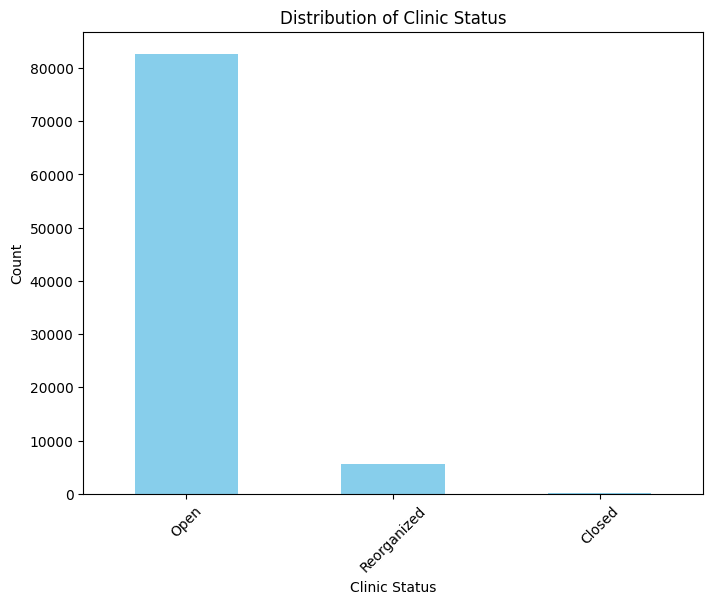

In [ ]:
clinic_status_counts = art_success['Clinic Status'].value_counts()
plt.figure(figsize=(8, 6))
clinic_status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Clinic Status')
plt.xlabel('Clinic Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
def extract_coordinates(x):
    try:
        latitude = float(x.split()[2].replace(')', ''))
        longitude = float(x.split()[1].replace('(', ''))
        return Point(longitude, latitude)
    except:
        return None

# Apply the function to extract coordinates and create a GeoDataFrame
art_success['GeoLocation'] = art_success['GeoLocation'].apply(extract_coordinates)
gdf = gpd.GeoDataFrame(art_success, geometry='GeoLocation')

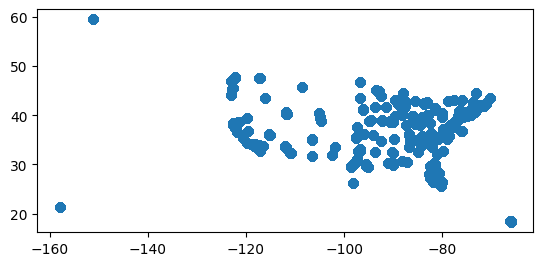

In [ ]:
gdf.plot()
plt.show()

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


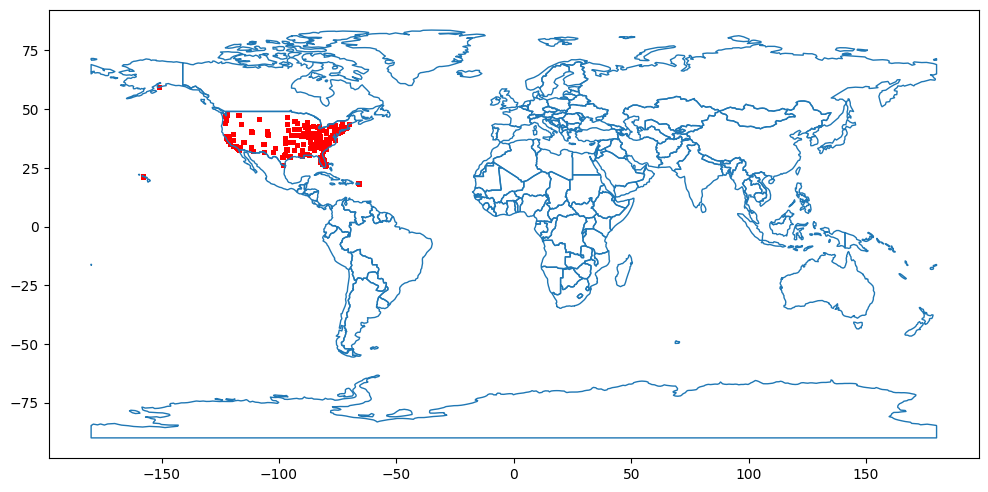

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=plt.gca(), linewidth=1)
gdf.plot(ax=plt.gca(), color='red', marker='o', markersize=5)

# Show the plot
plt.show()

In [ ]:
art_success.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'FacilityName',
       'MedicalDirector', 'Address', 'City', 'ZipCode', 'Phone',
       'Clinic Status', 'Type', 'Topic', 'Question', 'Filter',
       'Breakout_Category', 'Breakout', 'Data_Value', 'Data_Value_num',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Cycle_Count',
       'ClinicId', 'TypeId', 'TopicId', 'QuestionId', 'FilterId',
       'BreakOutCategoryId', 'BreakOutId', 'GeoLocation'],
      dtype='object')

In [ ]:
art_success["Success_rate"]= label_encoder.fit_transform(art_success['Topic'])



art_success["Success_rate"].value_counts()

0    64944
1    23434
Name: Success_rate, dtype: int64

In [ ]:

art_success["Success_rate"].value_counts()



##Success Rates: Patients Using Donor Eggs == 0
### Success Rates: Patients Using Own Eggs == 1

0    64944
1    23434
Name: Success_rate, dtype: int64

In [ ]:
art_success= art_success['Success_rate']
art_success.head()

0    0
1    0
2    0
3    0
4    1
Name: Success_rate, dtype: int64

In [ ]:
art_patients_char.head()

,Data_Value_num,Cycle_Count,processed_column,Breakout_Category_endcoded
0,8.7,623.0,40.0,0
1,16.7,914.0,40.0,0
2,19.0,1894.0,39.0,0
3,29.0,1488.0,40.0,0
4,0.0,287.0,1.0,4


In [ ]:
art_locations.head()

,,State,FacilityName,Address,City,ZipCode,Clinic Status,Total Number of Cycles,ClinicId,Geolocation
0,2020,IL,Institute for Human Reproduction (IHR),"409 W. Huron St, Suite 500",Chicago,60654,Open,854,1,POINT (-87.6390277 41.894496)
1,2020,PA,Shady Grove Fertility-Pennsylvania,945 Chesterbrook Blvd,Wayne,19087,Open,2245,2,POINT (-75.4618736 40.0681343)
2,2020,TX,"Houston Infertility Clinic, Sonja Kristiansen, MD","9055 Katy Freeway, Suite 450",Houston,77024,Open,223,3,POINT (-95.5122645 29.7835813)
3,2020,FL,"Advanced Reproductive Specialists, Jacksonvill...","7051 Southpoint Pkwy, Suite 200",Jacksonville,32216,Open,310,4,POINT (-81.5907066 30.2576625)
4,2020,PA,Penn State Milton S. Hershey Medical Center,"35 Hope Dr, Suite 202",Hershey,17033,Open,130,6,POINT (-76.6611392 40.2701599)


## Feature Engineering

In [ ]:
art_locations.shape

(448, 10)

In [ ]:
art_patients_char.shape

(28864, 4)

In [ ]:
art_success.shape

(88378,)

In [ ]:
# Set the desired size
desired_size = 448

# Assuming art_locations, art_patients_char, and art_success are your dataframes
# Randomly sample rows to downsample art_locations and art_patients_char
art_locations_downsampled = art_locations.sample(n=desired_size, random_state=50)
art_patients_char_downsampled = art_patients_char.sample(n=desired_size, random_state=50)

# If needed, reset the index of the downsampled dataframes
art_locations_downsampled.reset_index(drop=True, inplace=True)
art_patients_char_downsampled.reset_index(drop=True, inplace=True)

# Upsample art_success to match the desired size
art_success_upsampled = art_success.sample(n=desired_size, replace=True, random_state=42)

# Print the shapes of the resulting dataframes
print(art_locations_downsampled.shape)
print(art_patients_char_downsampled.shape)
print(art_success_upsampled.shape)

(448, 10)
(448, 4)
(448,)


In [ ]:
art_success_upsampled.value_counts()

0    324
1    124
Name: Success_rate, dtype: int64

In [ ]:
art_locations_downsampled.reset_index(drop=True, inplace=True)
art_patients_char_downsampled.reset_index(drop=True, inplace=True)
art_success_upsampled.reset_index(drop=True, inplace=True)

# Concatenate the dataframes along columns
df = pd.concat([art_locations_downsampled, art_patients_char_downsampled, art_success_upsampled], axis=1)



In [ ]:
df.nunique()

                                1
State                          50
FacilityName                  447
Address                       447
City                          279
ZipCode                       379
Clinic Status                   3
Total Number of Cycles        385
ClinicId                      448
Geolocation                   447
Data_Value_num                251
Cycle_Count                   310
processed_column                5
Breakout_Category_endcoded     13
Success_rate                    2
dtype: int64

In [ ]:
df.head()

,,State,FacilityName,Address,City,ZipCode,Clinic Status,Total Number of Cycles,ClinicId,Geolocation,Data_Value_num,Cycle_Count,processed_column,Breakout_Category_endcoded,Success_rate
0,2020,IL,Carle Foundation Hospital Department of Reprod...,1818 E. Windsor Rd,Urbana,61801,Reorganized,31,844,POINT (-88.2036 40.1095),1.2,85.0,36.0,0,0
1,2020,NY,"Weill Cornell Medicine, Center for Reproductiv...","1305 York Ave, 6th Floor",New York,10021,Open,5211,437,POINT (-73.9551571 40.7654976),0.0,NaN,36.0,0,1
2,2020,VA,The New Hope Center for Reproductive Medicine,"448 Viking Dr, Suite 100",Virginia Beach,23452,Open,390,202,POINT (-76.072674 36.8268749),26.5,927.0,36.0,0,1
3,2020,AZ,"Fertility Treatment Center, PC","2155 E. Conference Dr, Suite 115",Tempe,85284,Open,548,246,POINT (-111.8950998 33.3423602),14.4,634.0,40.0,0,0
4,2020,RI,Women & Infants Fertility Center,"90 Plain St, 5th Floor",Providence,2903,Reorganized,804,721,POINT (-71.4122888 41.8140716),0.0,114.0,40.0,0,0


from matplotlib import pyplot as plt
_df_0['ZipCode'].plot(kind='hist', bins=20, title='ZipCode')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Total Number of Cycles'].plot(kind='hist', bins=20, title='Total Number of Cycles')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ClinicId'].plot(kind='hist', bins=20, title='ClinicId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Data_Value_num'].plot(kind='hist', bins=20, title='Data_Value_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('FacilityName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Address').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('City').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='ZipCode', y='Total Number of Cycles', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Total Number of Cycles', y='ClinicId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='ClinicId', y='Data_Value_num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Data_Value_num', y='Cycle_Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' ']
  ys = series['ZipCode']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values(' ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('State')):
  _plot_series(series, series_name, i)
  fig.legend(title='State', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' ')
_ = plt.ylabel('ZipCode')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' ']
  ys = series['ZipCode']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values(' ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('FacilityName')):
  _plot_series(series, series_name, i)
  fig.legend(title='FacilityName', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' ')
_ = plt.ylabel('ZipCode')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' ']
  ys = series['ZipCode']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values(' ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Address')):
  _plot_series(series, series_name, i)
  fig.legend(title='Address', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' ')
_ = plt.ylabel('ZipCode')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' ']
  ys = series['ZipCode']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values(' ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('City')):
  _plot_series(series, series_name, i)
  fig.legend(title='City', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' ')
_ = plt.ylabel('ZipCode')

from matplotlib import pyplot as plt
_df_16['ZipCode'].plot(kind='line', figsize=(8, 4), title='ZipCode')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Total Number of Cycles'].plot(kind='line', figsize=(8, 4), title='Total Number of Cycles')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['ClinicId'].plot(kind='line', figsize=(8, 4), title='ClinicId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Data_Value_num'].plot(kind='line', figsize=(8, 4), title='Data_Value_num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['FacilityName'].value_counts()
    for x_label, grp in _df_20.groupby('State')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('State')
_ = plt.ylabel('FacilityName')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Address'].value_counts()
    for x_label, grp in _df_21.groupby('FacilityName')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('FacilityName')
_ = plt.ylabel('Address')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['City'].value_counts()
    for x_label, grp in _df_22.groupby('Address')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Address')
_ = plt.ylabel('City')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Clinic Status'].value_counts()
    for x_label, grp in _df_23.groupby('City')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('City')
_ = plt.ylabel('Clinic Status')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='ZipCode', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['FacilityName'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='ZipCode', y='FacilityName', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Address'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='ZipCode', y='Address', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['City'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='ZipCode', y='City', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

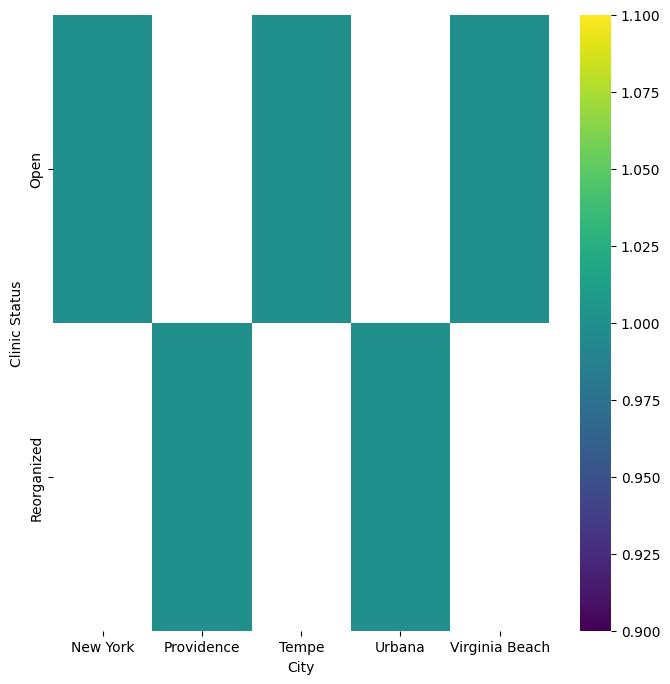

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Clinic Status'].value_counts()
    for x_label, grp in _df_23.groupby('City')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('City')
_ = plt.ylabel('Clinic Status')

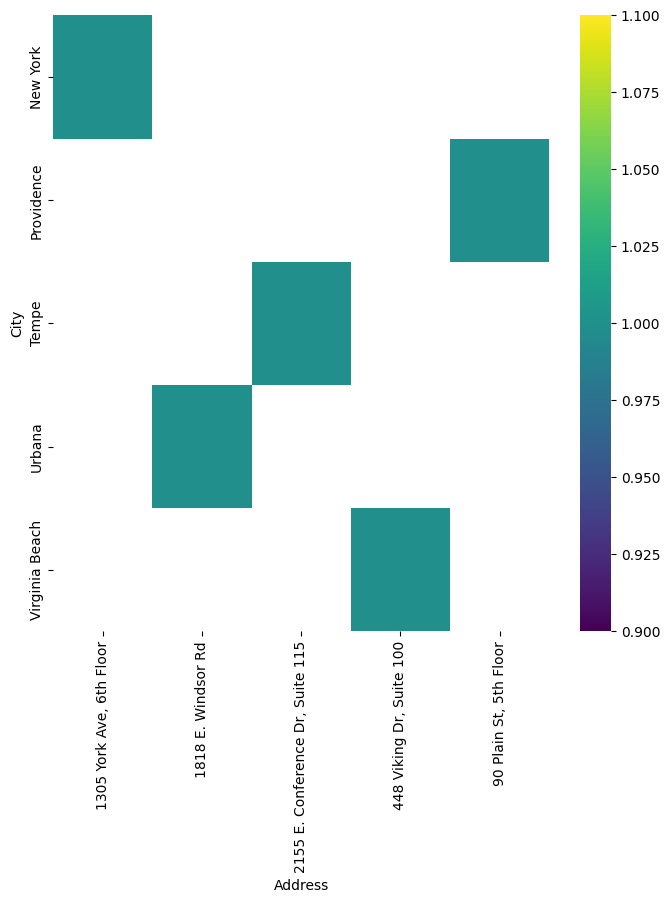

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['City'].value_counts()
    for x_label, grp in _df_22.groupby('Address')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Address')
_ = plt.ylabel('City')

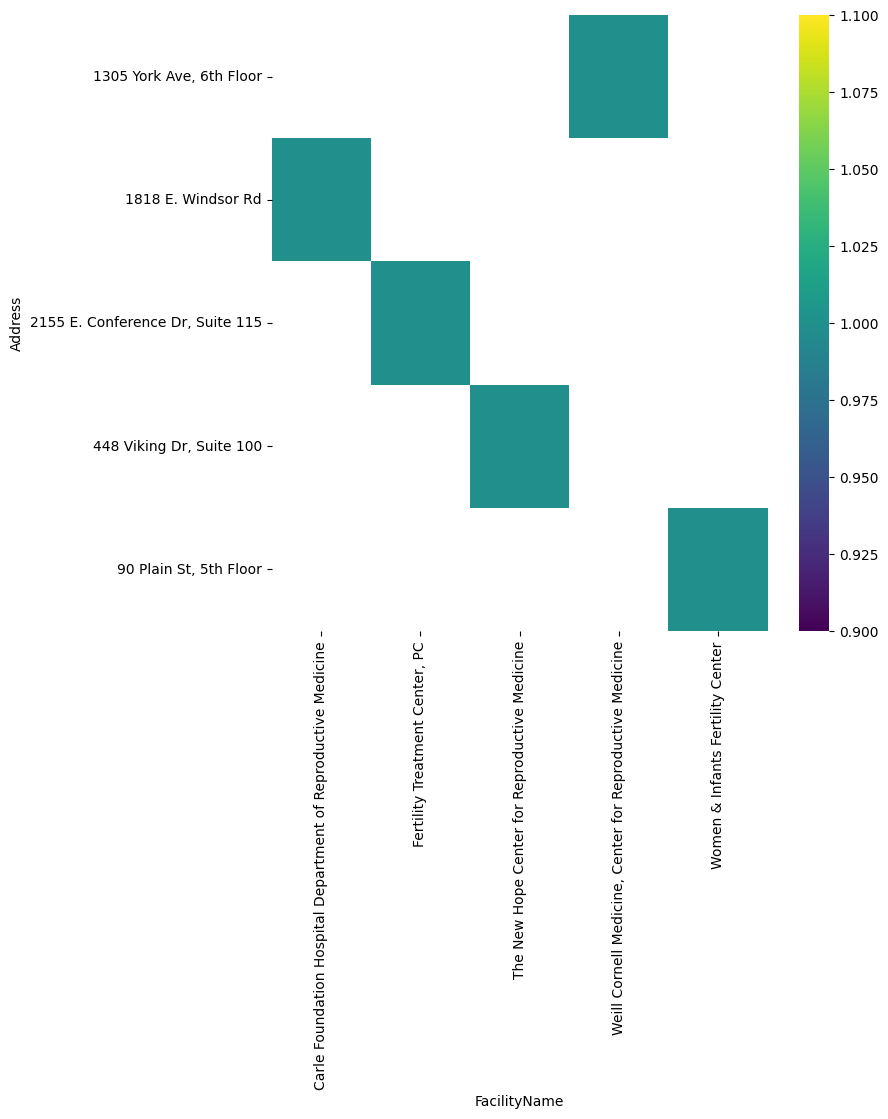

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Address'].value_counts()
    for x_label, grp in _df_21.groupby('FacilityName')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('FacilityName')
_ = plt.ylabel('Address')

In [ ]:
df.head()

,,State,FacilityName,Address,City,ZipCode,Clinic Status,Total Number of Cycles,ClinicId,Geolocation,Data_Value_num,Cycle_Count,processed_column,Breakout_Category_endcoded,Success_rate
0,2020,IL,Carle Foundation Hospital Department of Reprod...,1818 E. Windsor Rd,Urbana,61801,Reorganized,31,844,POINT (-88.2036 40.1095),1.2,85.0,36.0,0,0
1,2020,NY,"Weill Cornell Medicine, Center for Reproductiv...","1305 York Ave, 6th Floor",New York,10021,Open,5211,437,POINT (-73.9551571 40.7654976),0.0,NaN,36.0,0,1
2,2020,VA,The New Hope Center for Reproductive Medicine,"448 Viking Dr, Suite 100",Virginia Beach,23452,Open,390,202,POINT (-76.072674 36.8268749),26.5,927.0,36.0,0,1
3,2020,AZ,"Fertility Treatment Center, PC","2155 E. Conference Dr, Suite 115",Tempe,85284,Open,548,246,POINT (-111.8950998 33.3423602),14.4,634.0,40.0,0,0
4,2020,RI,Women & Infants Fertility Center,"90 Plain St, 5th Floor",Providence,2903,Reorganized,804,721,POINT (-71.4122888 41.8140716),0.0,114.0,40.0,0,0


In [ ]:
df["Clinic_new_status"]= label_encoder.fit_transform(df['Clinic Status'])

In [ ]:
df.head()

,,State,FacilityName,Address,City,ZipCode,Clinic Status,Total Number of Cycles,ClinicId,Geolocation,Data_Value_num,Cycle_Count,processed_column,Breakout_Category_endcoded,Success_rate,Clinic_new_status
0,2020,IL,Carle Foundation Hospital Department of Reprod...,1818 E. Windsor Rd,Urbana,61801,Reorganized,31,844,POINT (-88.2036 40.1095),1.2,85.0,36.0,0,0,2
1,2020,NY,"Weill Cornell Medicine, Center for Reproductiv...","1305 York Ave, 6th Floor",New York,10021,Open,5211,437,POINT (-73.9551571 40.7654976),0.0,NaN,36.0,0,1,1
2,2020,VA,The New Hope Center for Reproductive Medicine,"448 Viking Dr, Suite 100",Virginia Beach,23452,Open,390,202,POINT (-76.072674 36.8268749),26.5,927.0,36.0,0,1,1
3,2020,AZ,"Fertility Treatment Center, PC","2155 E. Conference Dr, Suite 115",Tempe,85284,Open,548,246,POINT (-111.8950998 33.3423602),14.4,634.0,40.0,0,0,1
4,2020,RI,Women & Infants Fertility Center,"90 Plain St, 5th Floor",Providence,2903,Reorganized,804,721,POINT (-71.4122888 41.8140716),0.0,114.0,40.0,0,0,2


In [ ]:
df.columns

Index([' ', 'State', 'FacilityName', 'Address', 'City', 'ZipCode',
       'Clinic Status', 'Total Number of Cycles', 'ClinicId', 'Geolocation',
       'Data_Value_num', 'Cycle_Count', 'processed_column',
       'Breakout_Category_endcoded', 'Success_rate', 'Clinic_new_status'],
      dtype='object')

In [ ]:
df.drop(['Clinic Status'], axis=1, inplace=True)

In [ ]:
df.head()

,,State,FacilityName,Address,City,ZipCode,Total Number of Cycles,ClinicId,Geolocation,Data_Value_num,Cycle_Count,processed_column,Breakout_Category_endcoded,Success_rate,Clinic_new_status
0,2020,IL,Carle Foundation Hospital Department of Reprod...,1818 E. Windsor Rd,Urbana,61801,31,844,POINT (-88.2036 40.1095),1.2,85.0,36.0,0,0,2
1,2020,NY,"Weill Cornell Medicine, Center for Reproductiv...","1305 York Ave, 6th Floor",New York,10021,5211,437,POINT (-73.9551571 40.7654976),0.0,NaN,36.0,0,1,1
2,2020,VA,The New Hope Center for Reproductive Medicine,"448 Viking Dr, Suite 100",Virginia Beach,23452,390,202,POINT (-76.072674 36.8268749),26.5,927.0,36.0,0,1,1
3,2020,AZ,"Fertility Treatment Center, PC","2155 E. Conference Dr, Suite 115",Tempe,85284,548,246,POINT (-111.8950998 33.3423602),14.4,634.0,40.0,0,0,1
4,2020,RI,Women & Infants Fertility Center,"90 Plain St, 5th Floor",Providence,2903,804,721,POINT (-71.4122888 41.8140716),0.0,114.0,40.0,0,0,2


In [ ]:
df.dtypes


                                int64
State                          object
FacilityName                   object
Address                        object
City                           object
ZipCode                         int64
Total Number of Cycles          int64
ClinicId                        int64
Geolocation                    object
Data_Value_num                float64
Cycle_Count                   float64
processed_column              float64
Breakout_Category_endcoded      int64
Success_rate                    int64
Clinic_new_status               int64
dtype: object

In [ ]:
# Assuming df is your DataFrame
columns_to_convert = ['Total Number of Cycles', 'ClinicId', 'Data_Value_num', 'Cycle_Count', 'processed_column', 'Breakout_Category_endcoded', 'Success_rate', 'Clinic_new_status']

# Replace commas and convert to integers, replacing NaN values with 0
for column in columns_to_convert:
    df[column] = df[column].replace({',': ''}, regex=True).fillna(0).astype(int)


In [ ]:
df.dtypes

                               int64
State                         object
FacilityName                  object
Address                       object
City                          object
ZipCode                        int64
Total Number of Cycles         int64
ClinicId                       int64
Geolocation                   object
Data_Value_num                 int64
Cycle_Count                    int64
processed_column               int64
Breakout_Category_endcoded     int64
Success_rate                   int64
Clinic_new_status              int64
dtype: object

In [ ]:
df.head()

,,State,FacilityName,Address,City,ZipCode,Total Number of Cycles,ClinicId,Geolocation,Data_Value_num,Cycle_Count,processed_column,Breakout_Category_endcoded,Success_rate,Clinic_new_status
0,2020,IL,Carle Foundation Hospital Department of Reprod...,1818 E. Windsor Rd,Urbana,61801,31,844,POINT (-88.2036 40.1095),1,85,36,0,0,2
1,2020,NY,"Weill Cornell Medicine, Center for Reproductiv...","1305 York Ave, 6th Floor",New York,10021,5211,437,POINT (-73.9551571 40.7654976),0,0,36,0,1,1
2,2020,VA,The New Hope Center for Reproductive Medicine,"448 Viking Dr, Suite 100",Virginia Beach,23452,390,202,POINT (-76.072674 36.8268749),26,927,36,0,1,1
3,2020,AZ,"Fertility Treatment Center, PC","2155 E. Conference Dr, Suite 115",Tempe,85284,548,246,POINT (-111.8950998 33.3423602),14,634,40,0,0,1
4,2020,RI,Women & Infants Fertility Center,"90 Plain St, 5th Floor",Providence,2903,804,721,POINT (-71.4122888 41.8140716),0,114,40,0,0,2


<Axes: >

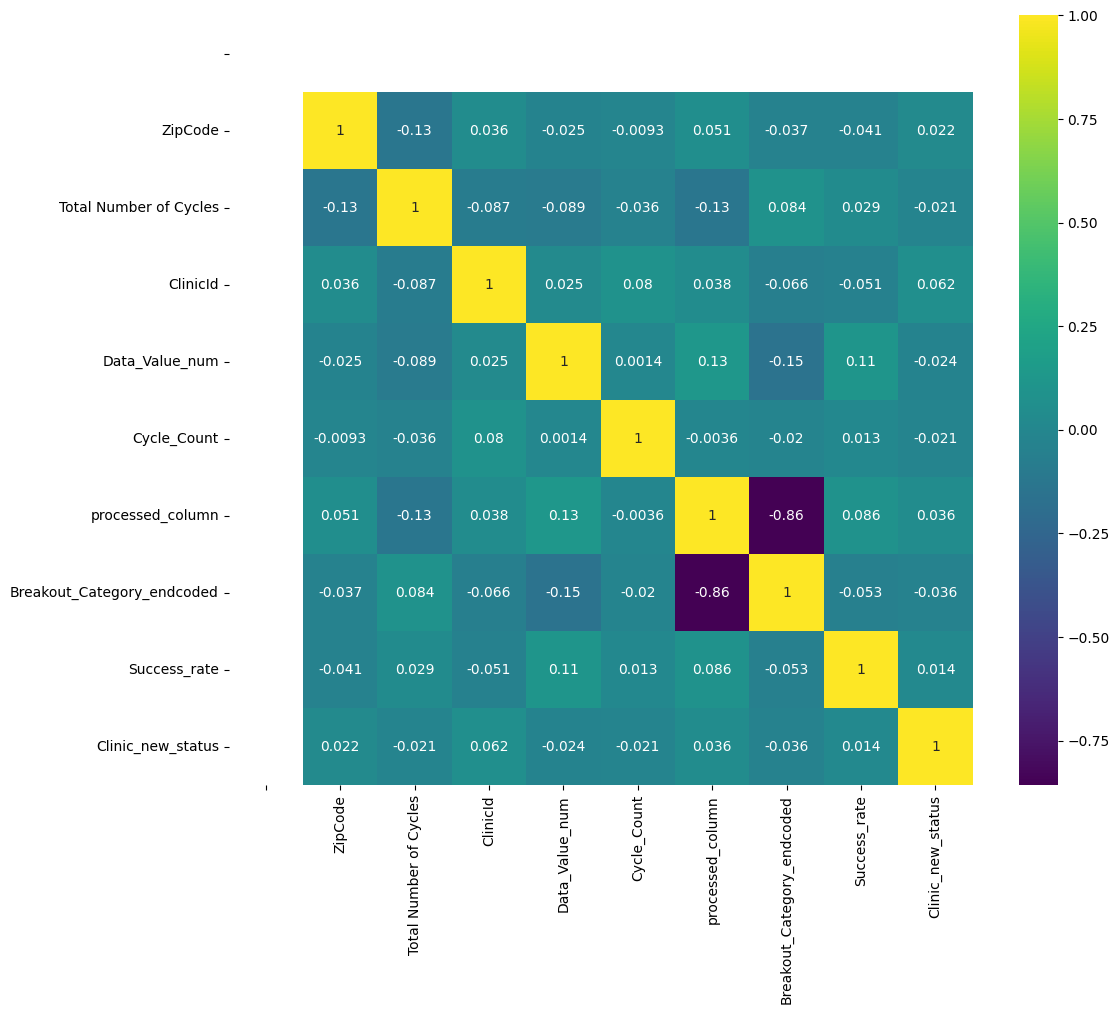

In [ ]:
corrr= df.corr()
plt.figure(figsize= (12,10))
sns.heatmap(corrr,annot=True, cmap="viridis", vmax=1)

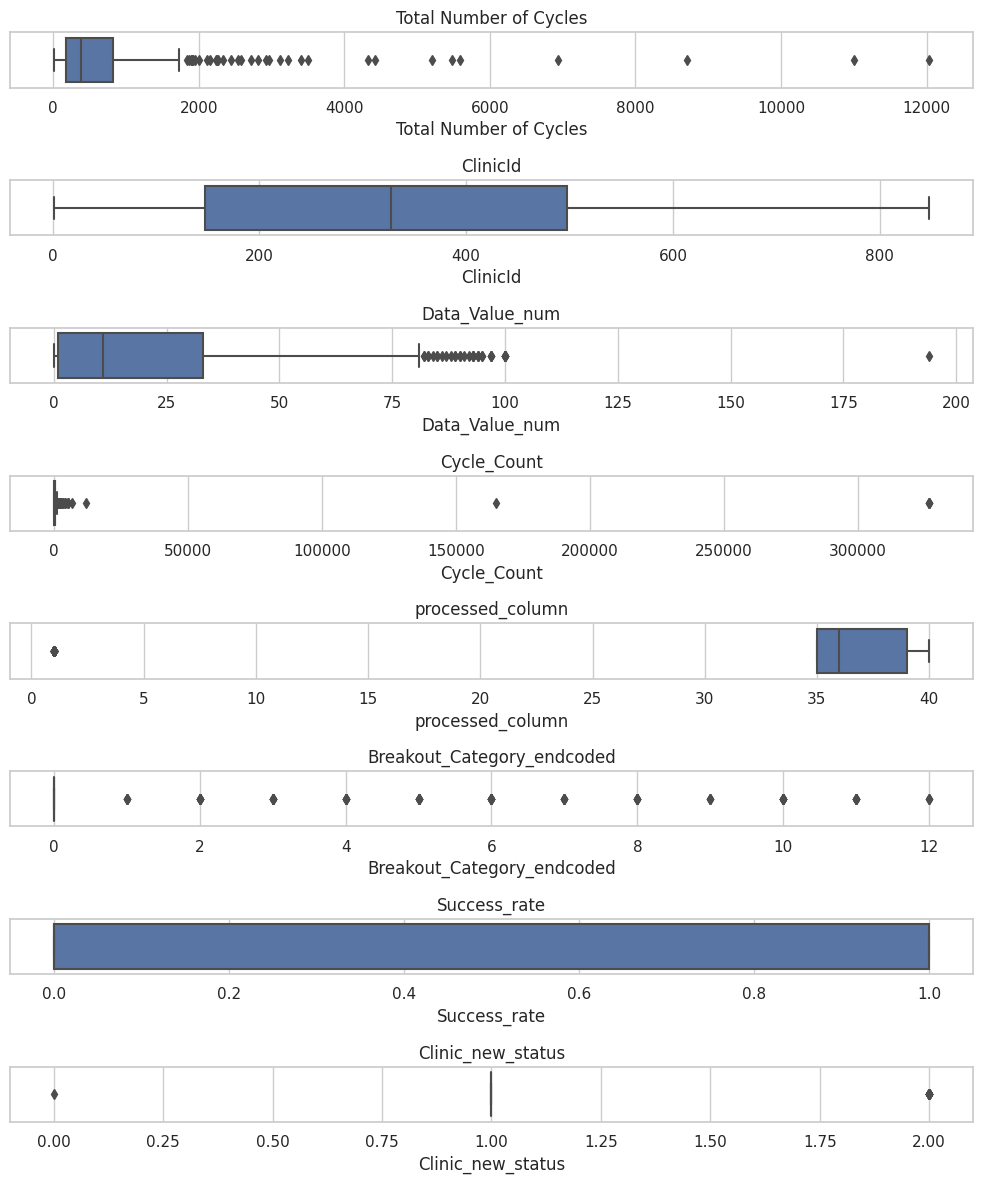

In [ ]:
numerical_columns = ['Total Number of Cycles', 'ClinicId', 'Data_Value_num', 'Cycle_Count', 'processed_column', 'Breakout_Category_endcoded', 'Success_rate', 'Clinic_new_status']

# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(10, 12))

# Iterate over each numerical column and create a boxplot
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

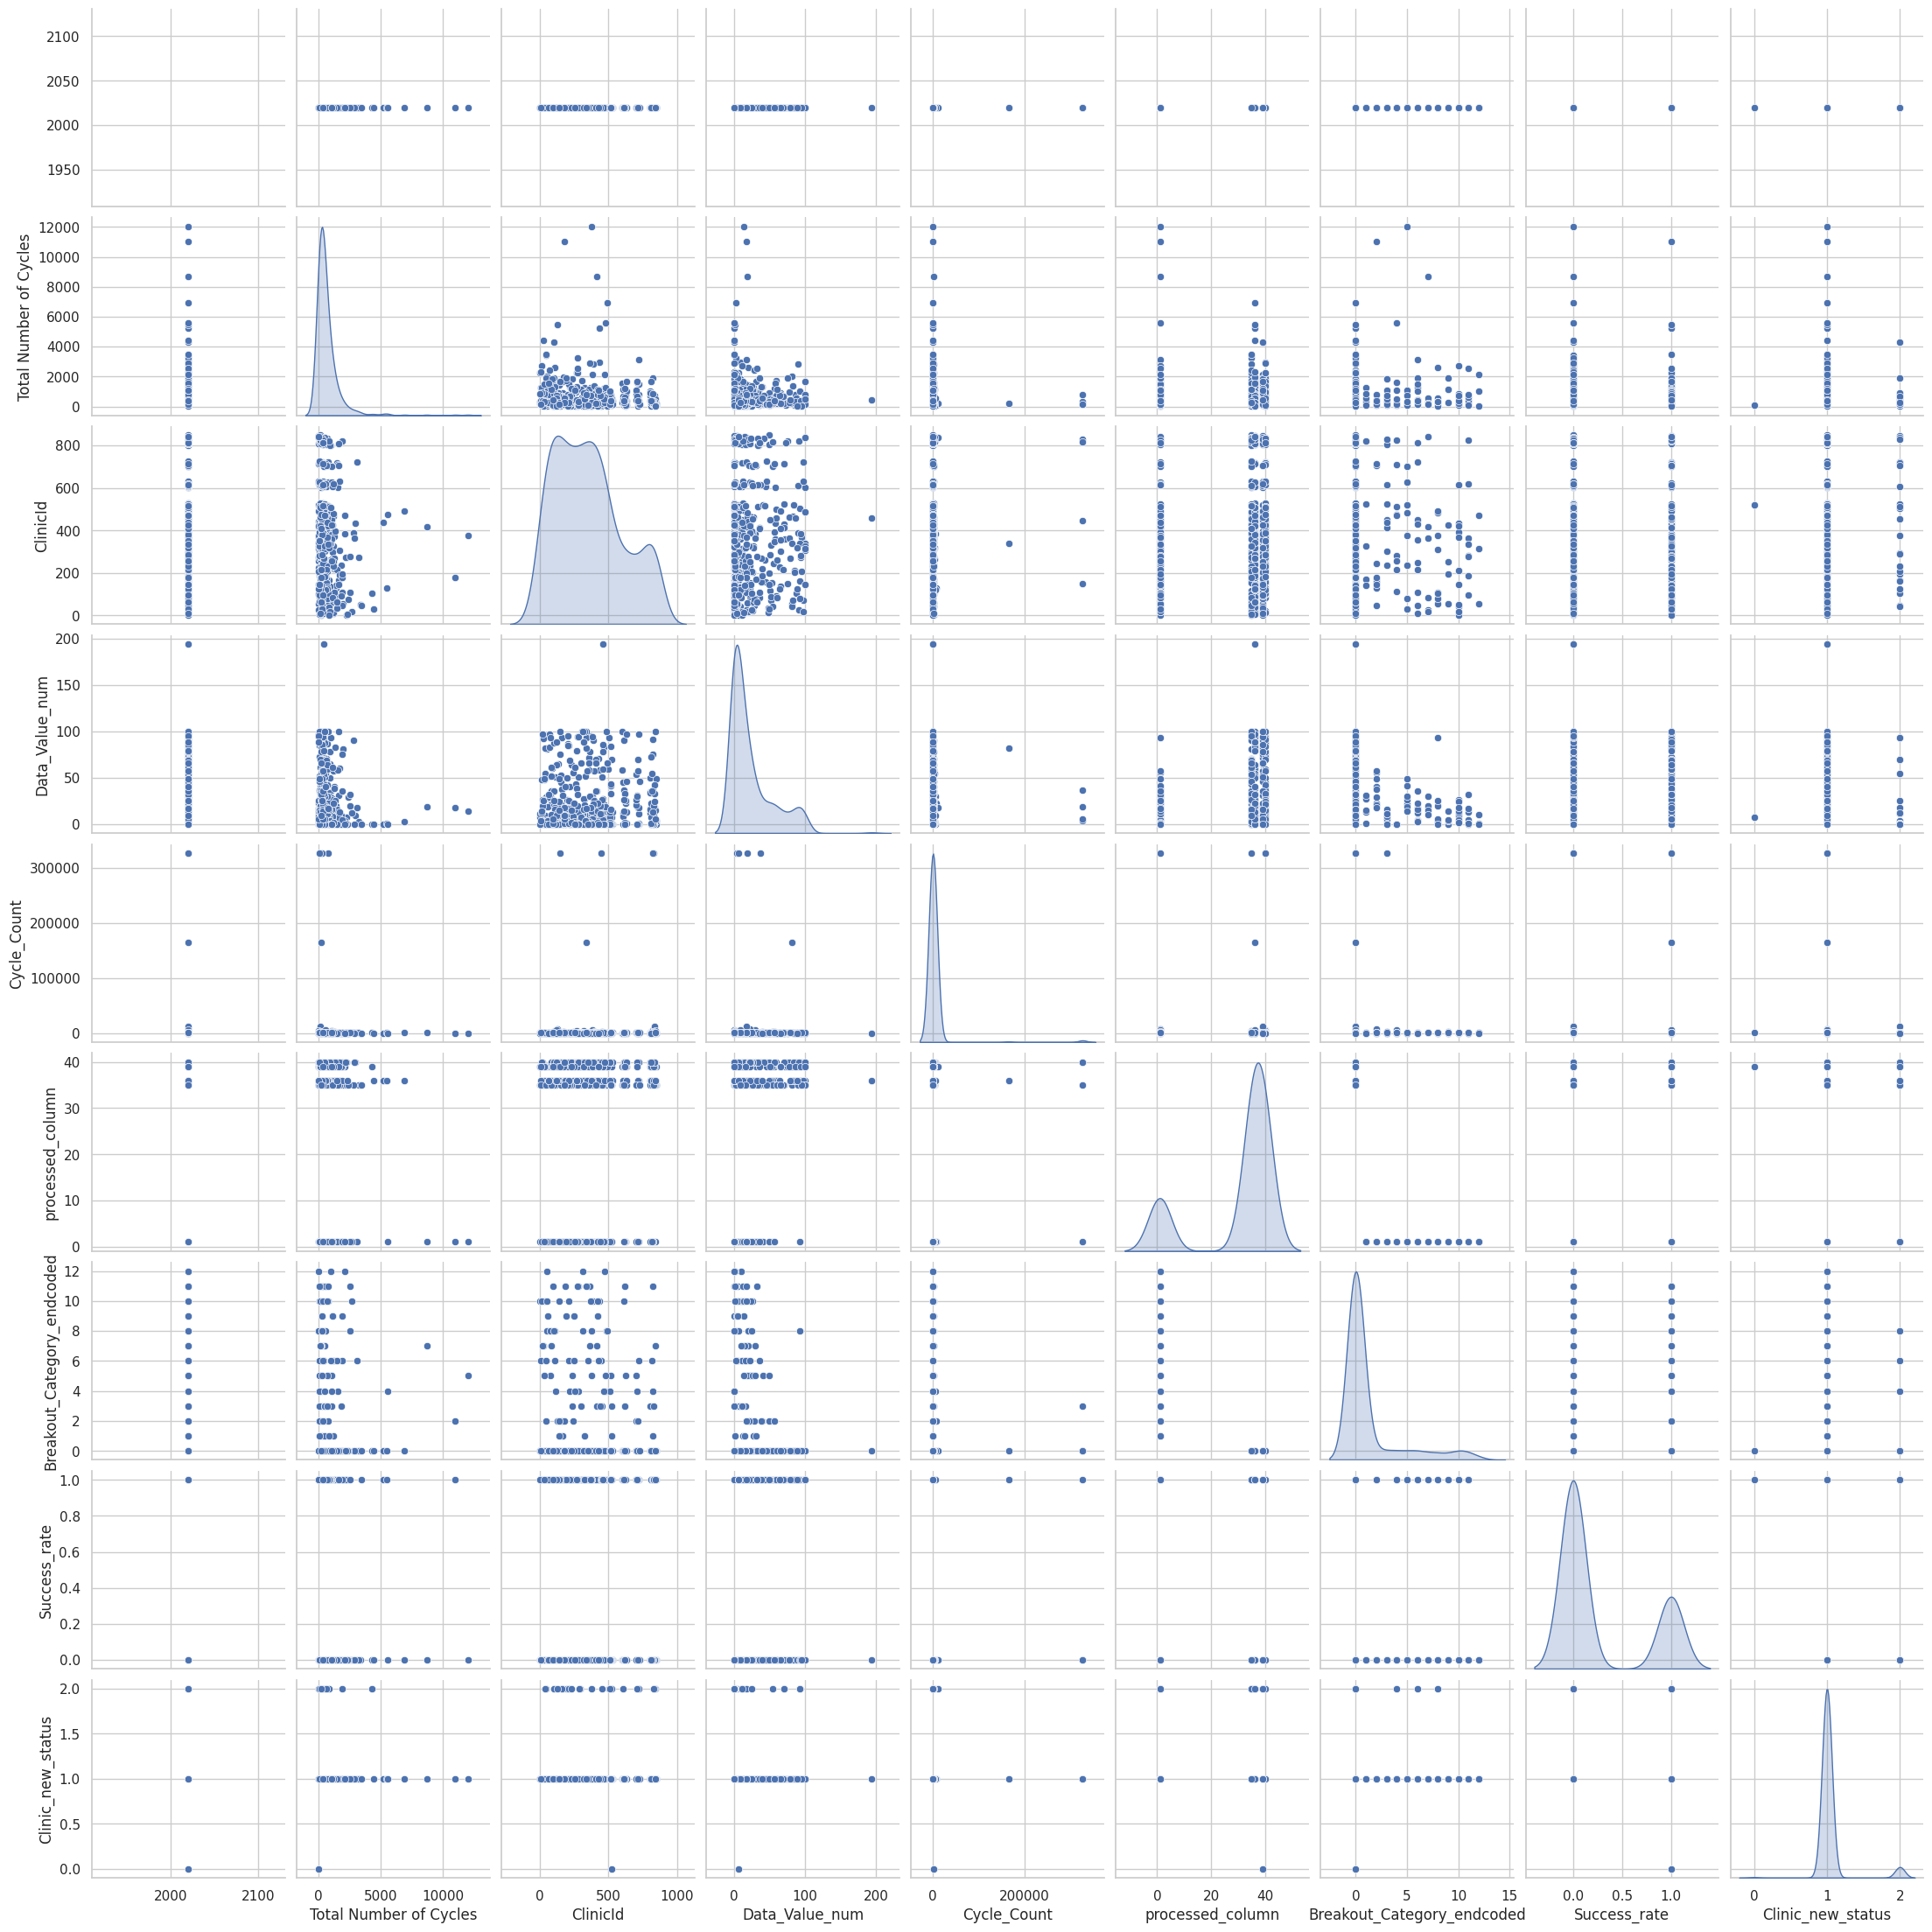

In [ ]:
sns.pairplot(data=df.drop("ZipCode", axis=1), diag_kind="kde")

In [ ]:
df.to_csv("project_data.csv")

## Model Development

In [ ]:
### Classifying success rate


df.head()

,,State,FacilityName,Address,City,ZipCode,Total Number of Cycles,ClinicId,Geolocation,Data_Value_num,Cycle_Count,processed_column,Breakout_Category_endcoded,Success_rate,Clinic_new_status
0,2020,IL,Carle Foundation Hospital Department of Reprod...,1818 E. Windsor Rd,Urbana,61801,31,844,POINT (-88.2036 40.1095),1,85,36,0,0,2
1,2020,NY,"Weill Cornell Medicine, Center for Reproductiv...","1305 York Ave, 6th Floor",New York,10021,5211,437,POINT (-73.9551571 40.7654976),0,0,36,0,1,1
2,2020,VA,The New Hope Center for Reproductive Medicine,"448 Viking Dr, Suite 100",Virginia Beach,23452,390,202,POINT (-76.072674 36.8268749),26,927,36,0,1,1
3,2020,AZ,"Fertility Treatment Center, PC","2155 E. Conference Dr, Suite 115",Tempe,85284,548,246,POINT (-111.8950998 33.3423602),14,634,40,0,0,1
4,2020,RI,Women & Infants Fertility Center,"90 Plain St, 5th Floor",Providence,2903,804,721,POINT (-71.4122888 41.8140716),0,114,40,0,0,2


In [ ]:
df.tail()

,,State,FacilityName,Address,City,ZipCode,Total Number of Cycles,ClinicId,Geolocation,Data_Value_num,Cycle_Count,processed_column,Breakout_Category_endcoded,Success_rate,Clinic_new_status
443,2020,WA,"University Reproductive Care, University of Wa...","4245 Roosevelt Way N.E., 3rd Floor",Seattle,98105,261,180,POINT (-122.3179059 47.6588312),9,377,35,0,0,1
444,2020,IL,InVia Fertility Specialists,"1585 N. Barrington Rd, Bldg 2, Suite 406",Hoffman Estates,60169,1059,425,POINT (-88.1412181 42.0541958),0,77,39,0,0,1
445,2020,PR,"GREFI, Gynecology, Reproductive Endocrinology ...","First Bank Building, 1519 Ponce de León Ave, S...",San Juan,909,129,145,POINT (-66.0706255 18.4418194),49,245,1,2,0,1
446,2020,TN,Tennessee Fertility Institute,"9160 Carothers Pkwy, Suite 201",Franklin,37067,352,715,POINT (-86.8001856 35.9602141),57,794,1,2,0,1
447,2020,IA,"University of Iowa Hospitals and Clinics, Cent...","Department of Obstetrics and Gynecology, 1360 ...",Iowa City,52245,1060,255,POINT (-91.5161819 41.677803),0,740,1,4,0,1


In [ ]:
df["Geolocation"]

0             POINT (-88.2036 40.1095)
1       POINT (-73.9551571 40.7654976)
2        POINT (-76.072674 36.8268749)
3      POINT (-111.8950998 33.3423602)
4       POINT (-71.4122888 41.8140716)
                    ...               
443    POINT (-122.3179059 47.6588312)
444     POINT (-88.1412181 42.0541958)
445     POINT (-66.0706255 18.4418194)
446     POINT (-86.8001856 35.9602141)
447      POINT (-91.5161819 41.677803)
Name: Geolocation, Length: 448, dtype: object

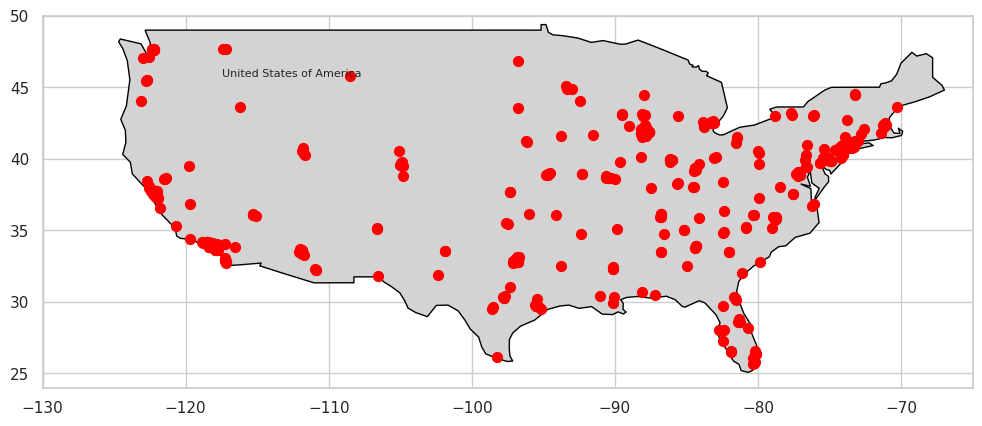

In [ ]:
import re

df['Longitude'] = df['Geolocation'].apply(lambda x: float(re.findall(r'-?\d+\.\d+', x)[0]))
df['Latitude'] = df['Geolocation'].apply(lambda x: float(re.findall(r'-?\d+\.\d+', x)[1]))



usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = usa[usa['name'] == 'United States of America']

# Creating a GeoDataFrame for the points
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
usa.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot points
gdf_points.plot(ax=ax, color='red', marker='o', markersize=50)

# Add state names
for x, y, label in zip(usa.geometry.centroid.x, usa.geometry.centroid.y, usa['name']):
    ax.text(x, y, label, fontsize=8, ha='center')

# Set plot limits for zooming in
ax.set_xlim([-130, -65])
ax.set_ylim([24, 50])

plt.show()

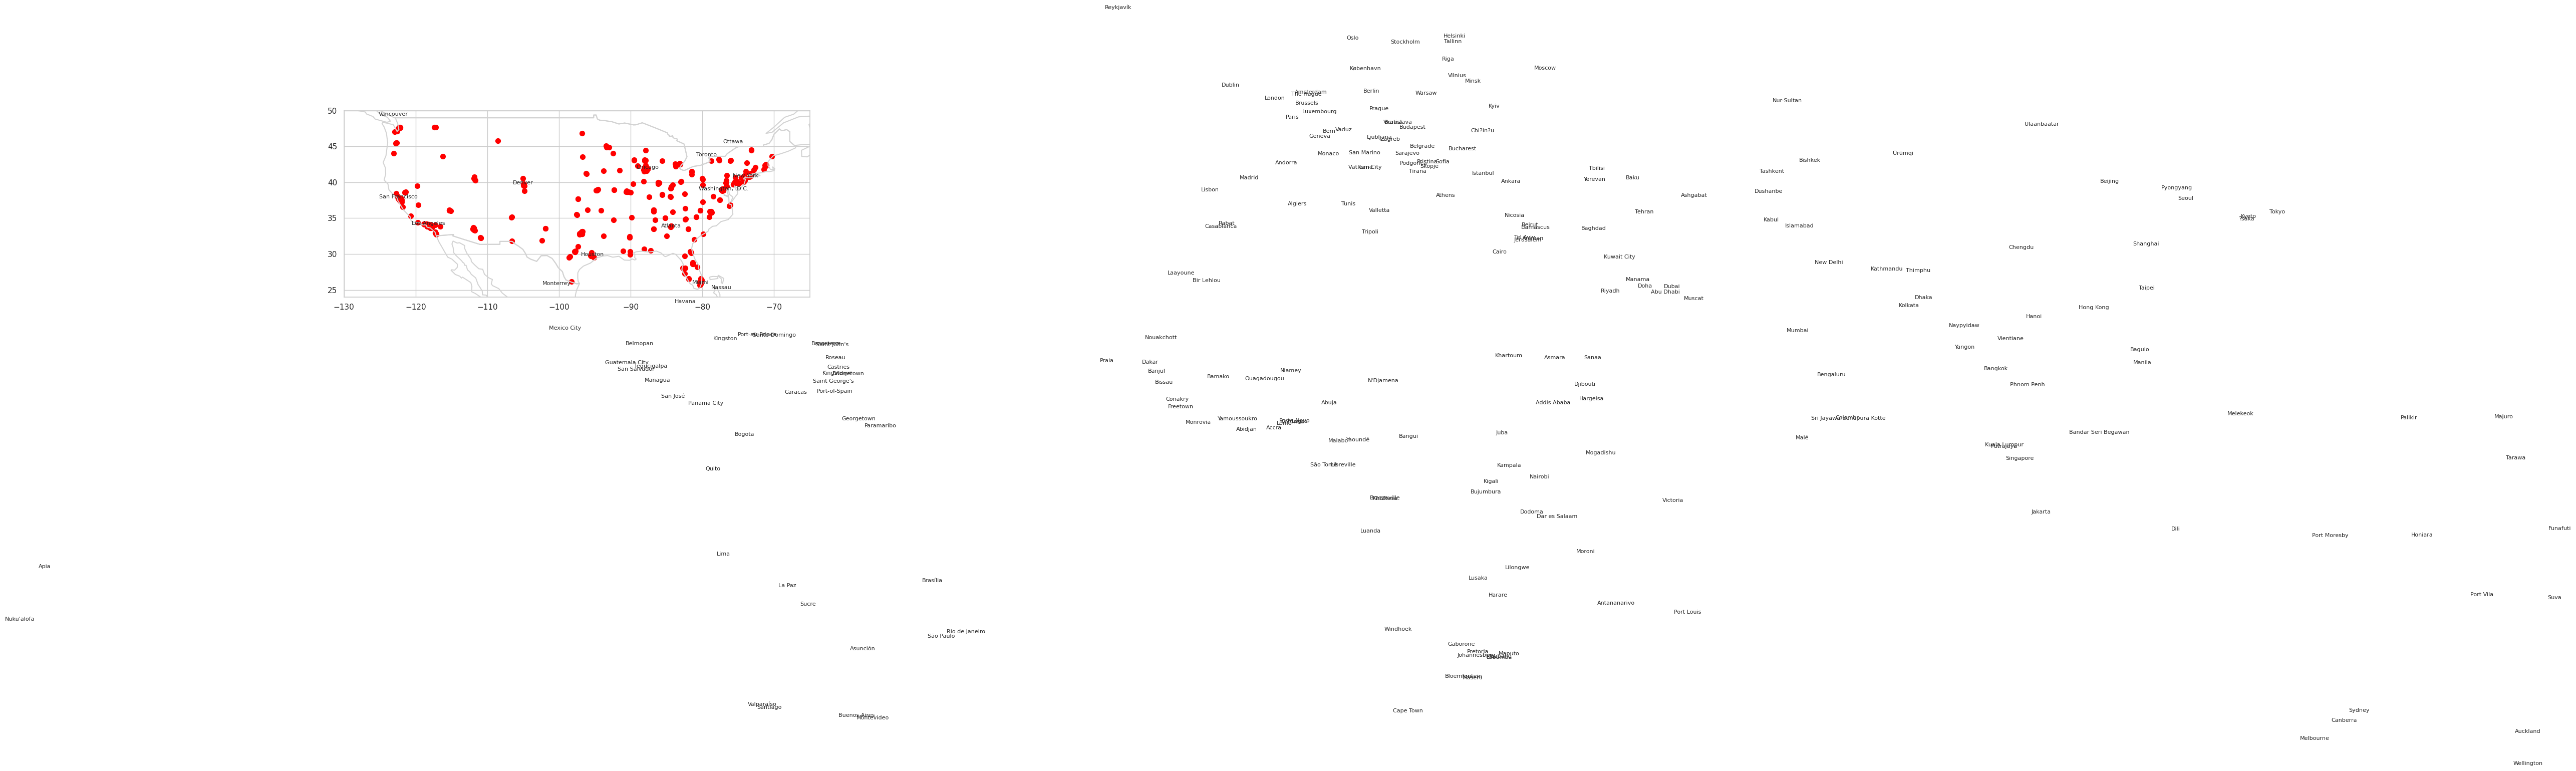

In [ ]:
usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Loading the US States dataset with higher resolution
us_states_20m = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Creating a GeoDataFrame for the points
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot USA states
usa_states.boundary.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot points
gdf_points.plot(ax=ax, color='red', marker='o', markersize=50)

# Add state names
for x, y, label in zip(us_states_20m.geometry.centroid.x, us_states_20m.geometry.centroid.y, us_states_20m['name']):
    ax.text(x, y, label, fontsize=8, ha='center')

# Set plot limits for zooming in
ax.set_xlim([-130, -65])
ax.set_ylim([24, 50])

plt.show()

In [ ]:
df.head()

,,State,FacilityName,Address,City,ZipCode,Total Number of Cycles,ClinicId,Geolocation,Data_Value_num,Cycle_Count,processed_column,Breakout_Category_endcoded,Success_rate,Clinic_new_status,Longitude,Latitude
0,2020,IL,Carle Foundation Hospital Department of Reprod...,1818 E. Windsor Rd,Urbana,61801,31,844,POINT (-88.2036 40.1095),1,85,36,0,0,2,-88.203600,40.109500
1,2020,NY,"Weill Cornell Medicine, Center for Reproductiv...","1305 York Ave, 6th Floor",New York,10021,5211,437,POINT (-73.9551571 40.7654976),0,0,36,0,1,1,-73.955157,40.765498
2,2020,VA,The New Hope Center for Reproductive Medicine,"448 Viking Dr, Suite 100",Virginia Beach,23452,390,202,POINT (-76.072674 36.8268749),26,927,36,0,1,1,-76.072674,36.826875
3,2020,AZ,"Fertility Treatment Center, PC","2155 E. Conference Dr, Suite 115",Tempe,85284,548,246,POINT (-111.8950998 33.3423602),14,634,40,0,0,1,-111.895100,33.342360
4,2020,RI,Women & Infants Fertility Center,"90 Plain St, 5th Floor",Providence,2903,804,721,POINT (-71.4122888 41.8140716),0,114,40,0,0,2,-71.412289,41.814072


In [ ]:
!pip install mplleaflet
!pip install folium


In [ ]:
import mplleaflet
import folium

map_center = [37.0902, -95.7129]  # Center coordinates of the USA
folium_map = folium.Map(location=map_center, zoom_start=4)

# Add markers for each facility
for index, row in df.iterrows():
    facility_name = row['FacilityName']
    coordinates = [row['Latitude'], row['Longitude']]

    popup = folium.Popup(facility_name, parse_html=True)
    marker = folium.Marker(location=coordinates, popup=popup)
    marker.add_to(folium_map)

# Save the map as an HTML file
folium_map.save("interactive_map.html")

In [ ]:
df.head()

,,State,FacilityName,Address,City,ZipCode,Total Number of Cycles,ClinicId,Geolocation,Data_Value_num,Cycle_Count,processed_column,Breakout_Category_endcoded,Success_rate,Clinic_new_status,Longitude,Latitude
0,2020,IL,Carle Foundation Hospital Department of Reprod...,1818 E. Windsor Rd,Urbana,61801,31,844,POINT (-88.2036 40.1095),1,85,36,0,0,2,-88.203600,40.109500
1,2020,NY,"Weill Cornell Medicine, Center for Reproductiv...","1305 York Ave, 6th Floor",New York,10021,5211,437,POINT (-73.9551571 40.7654976),0,0,36,0,1,1,-73.955157,40.765498
2,2020,VA,The New Hope Center for Reproductive Medicine,"448 Viking Dr, Suite 100",Virginia Beach,23452,390,202,POINT (-76.072674 36.8268749),26,927,36,0,1,1,-76.072674,36.826875
3,2020,AZ,"Fertility Treatment Center, PC","2155 E. Conference Dr, Suite 115",Tempe,85284,548,246,POINT (-111.8950998 33.3423602),14,634,40,0,0,1,-111.895100,33.342360
4,2020,RI,Women & Infants Fertility Center,"90 Plain St, 5th Floor",Providence,2903,804,721,POINT (-71.4122888 41.8140716),0,114,40,0,0,2,-71.412289,41.814072


In [ ]:
df.drop([" ", "State", "FacilityName","Address", "City","ZipCode", "Geolocation","Longitude","Latitude"], axis=1, inplace=True)

In [ ]:
df.head()

,Total Number of Cycles,ClinicId,Data_Value_num,Cycle_Count,processed_column,Breakout_Category_endcoded,Success_rate,Clinic_new_status
0,31,844,1,85,36,0,0,2
1,5211,437,0,0,36,0,1,1
2,390,202,26,927,36,0,1,1
3,548,246,14,634,40,0,0,1
4,804,721,0,114,40,0,0,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, make_scorer
from sklearn.metrics import confusion_matrix



In [ ]:
X = df.drop(['Success_rate', 'Clinic_new_status'], axis=1)
# Target variable (y) will be 'Success_rate'
y = df['Success_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Classifier:
Accuracy: 0.6518518518518519
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.92      0.79        93
           1       0.22      0.05      0.08        42

    accuracy                           0.65       135
   macro avg       0.45      0.49      0.43       135
weighted avg       0.54      0.65      0.57       135



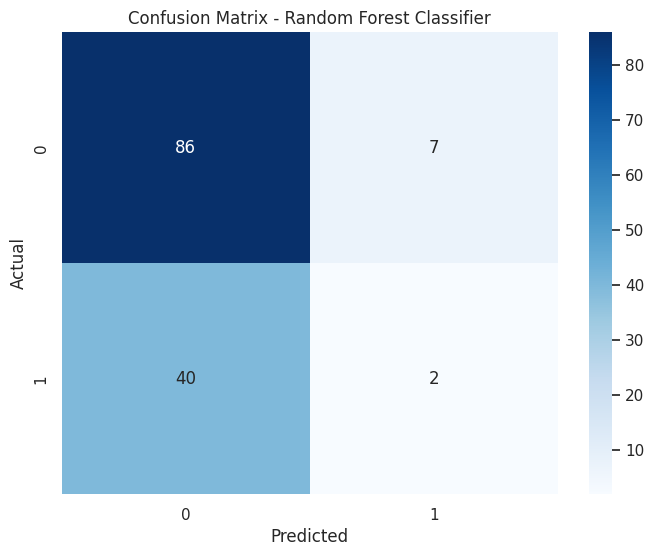

In [ ]:
cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### SVC

In [ ]:
svc_classifier = SVC(random_state=42)
svc_classifier.fit(X_train_scaled, y_train)
svc_predictions = svc_classifier.predict(X_test_scaled)
print("\nSupport Vector Classifier:")
print("Accuracy:", accuracy_score(y_test, svc_predictions))
print("Classification Report:\n", classification_report(y_test, svc_predictions))



Support Vector Classifier:
Accuracy: 0.6888888888888889
Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82        93
           1       0.00      0.00      0.00        42

    accuracy                           0.69       135
   macro avg       0.34      0.50      0.41       135
weighted avg       0.47      0.69      0.56       135



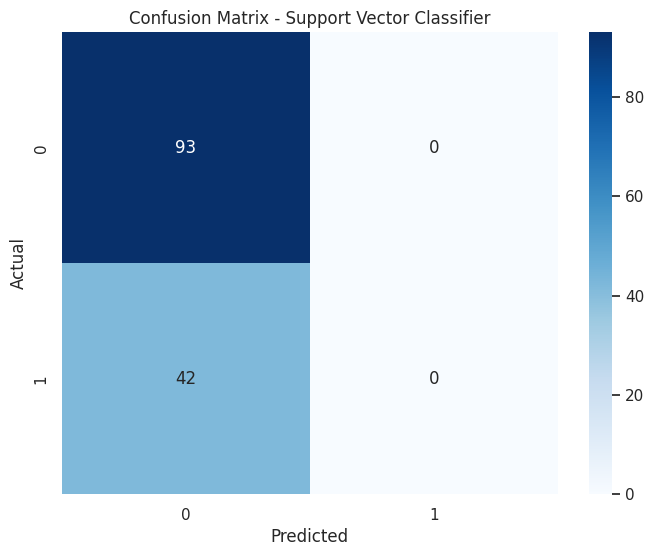

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, svc_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svc_classifier.classes_, yticklabels=svc_classifier.classes_)
plt.title('Confusion Matrix - Support Vector Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### KNN

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)
print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))


K-Nearest Neighbors:
Accuracy: 0.6962962962962963
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.91      0.81        93
           1       0.53      0.21      0.31        42

    accuracy                           0.70       135
   macro avg       0.62      0.56      0.56       135
weighted avg       0.66      0.70      0.65       135



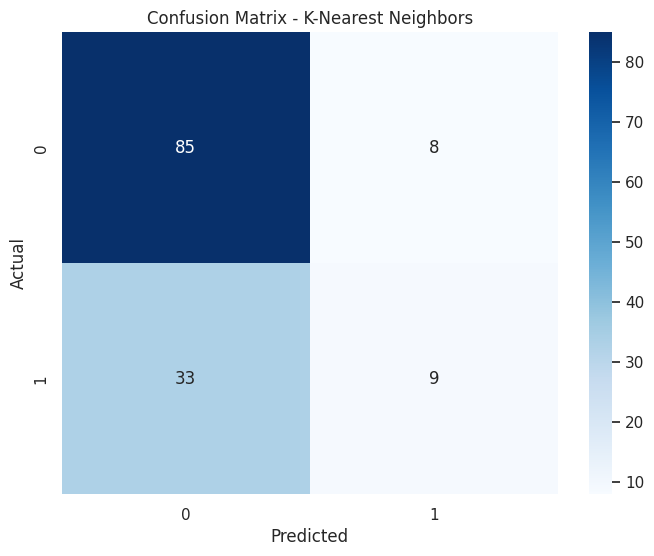

In [ ]:
cm = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Logistic Regression

In [ ]:
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_scaled, y_train)
logreg_predictions = logreg_classifier.predict(X_test_scaled)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, logreg_predictions))
print("Classification Report:\n", classification_report(y_test, logreg_predictions))


Logistic Regression:
Accuracy: 0.674074074074074
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.98      0.81        93
           1       0.00      0.00      0.00        42

    accuracy                           0.67       135
   macro avg       0.34      0.49      0.40       135
weighted avg       0.47      0.67      0.55       135



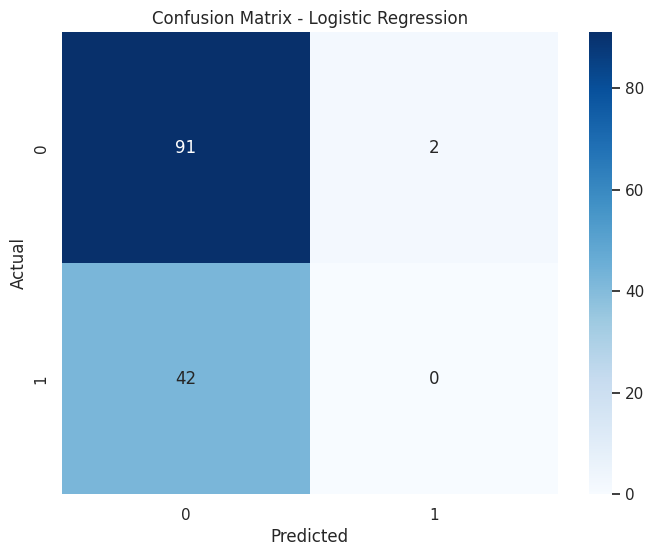

In [ ]:
cm = confusion_matrix(y_test, logreg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logreg_classifier.classes_, yticklabels=logreg_classifier.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###Model Optimization

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
X = df.drop('Success_rate', axis=1)
# Target variable (y) will be 'Success_rate'
y = df['Success_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

# Build models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Train and evaluate models
for model_name, model in models.items():
    # Cross-validation with StratifiedKFold
    cv_results = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=make_scorer(accuracy_score))
    avg_accuracy = cv_results.mean()

    # Fit the model on the entire training set for final evaluation
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Add results to DataFrame
    results_df = results_df.append({'Model': model_name, 'Accuracy': test_accuracy}, ignore_index=True)

    # Print results
    print(f"{model_name}:")
    print(f"Average Cross-Validation Accuracy: {avg_accuracy:.4f}")
    print(f"Test Set Accuracy: {test_accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("="*50)



Random Forest:
Average Cross-Validation Accuracy: 0.6837
Test Set Accuracy: 0.6889
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        98
           1       0.27      0.08      0.12        37

    accuracy                           0.69       135
   macro avg       0.50      0.50      0.47       135
weighted avg       0.60      0.69      0.62       135

Support Vector Classifier:
Average Cross-Validation Accuracy: 0.7189
Test Set Accuracy: 0.7259
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        98
           1       0.00      0.00      0.00        37

    accuracy                           0.73       135
   macro avg       0.36      0.50      0.42       135
weighted avg       0.53      0.73      0.61       135

K-Nearest Neighbors:
Average Cross-Validation Accuracy: 0.6615
Test Set Accuracy: 0.6667
              precision    recall  f1-score   support

           0       0.72 

In [ ]:
results_df

,Model,Accuracy
0,Random Forest,0.688889
1,Support Vector Classifier,0.725926
2,K-Nearest Neighbors,0.666667
3,Logistic Regression,0.703704


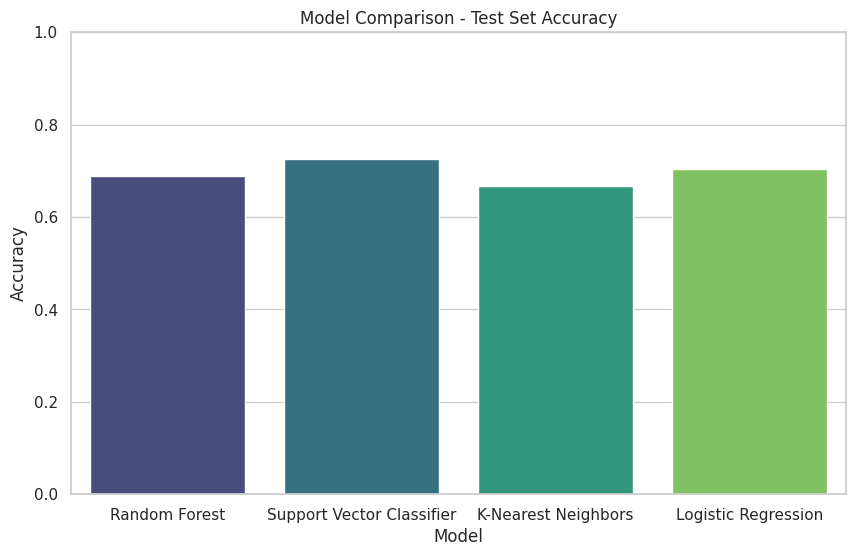

In [ ]:

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison - Test Set Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to better visualize differences
plt.show()